In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

create_epoch = epoch.create_epoch

model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)
# X, Y = create_epoch()




# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
X = np.loadtxt("Data_train/Saved/arrayX.txt", delimiter=",")
Y = np.loadtxt("Data_train/Saved/arrayY.txt", delimiter=",")

In [62]:
array = np.asarray([1,2,3,4,5,1,2,3,4,5])
np.roll(array, -1)

array([2, 3, 4, 5, 1, 2, 3, 4, 5, 1])

In [88]:
Y

(316953,)

In [86]:
temp = np.copy(Y)
temp1 = np.roll(temp, -1)
temp2 = np.roll(temp, -2)
temp3 = np.roll(temp, -3)
temp4 = np.roll(temp, -4)
temp5 = np.roll(temp, -5)
temp6 = np.roll(temp, -6)

result = np.column_stack((temp, temp1, temp2, temp3, temp4, temp5, temp6))

len_sku = 903
day_sku = result.shape[0]/len_sku
day_pred = 7

start = (int)(day_sku - day_pred)


for i in range(1, len_sku + 1):

          result = np.delete(result, np.s_[start*i : start*i + day_pred], axis = 0)

result.shape


(310632, 7)

In [94]:
print(result[1030])
print(result[1031])
print(result[1032])

[0. 0. 2. 1. 0. 2. 2.]
[0. 2. 1. 0. 2. 2. 1.]
[ 0. 50. 10. 15. 10.  7.  7.]


In [39]:
print(X[0, :17])
print(X[1, :17])
print(X[351, :17])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.  1.]


In [4]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(253562, 785)
(63391, 785)
(253562,)
(63391,)


In [26]:
model.load_model('/home/it/Desktop/NTMINH/Report-data-analysis/Model/Data_train/Saved/model_history_daytime_cat_pred_one_day')

In [6]:
# model.fit(X_train, y_train)
# print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [7]:
# make predictions for test data
y_pred = model.predict(X_test)

In [8]:
np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0]

1.0291216007123953

In [9]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

In [10]:

print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

Số lượng lable > 0 27602
Số lượng lable == 0 35789
Số lượng pred > 0 25024
Số lượng pred == 0 38367
Số lượng pred == 0 0


In [11]:
total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (y_pred_int == 0)).sum()
acc/total

0.8485009360418005

In [12]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0]

0.7310160704229035

In [13]:
print(np.max(np.subtract(y_test[condition], y_pred[condition])))
print(np.min(np.subtract(y_test[condition], y_pred[condition])))

820.6215080022812
-323.5518798828125


<AxesSubplot:>

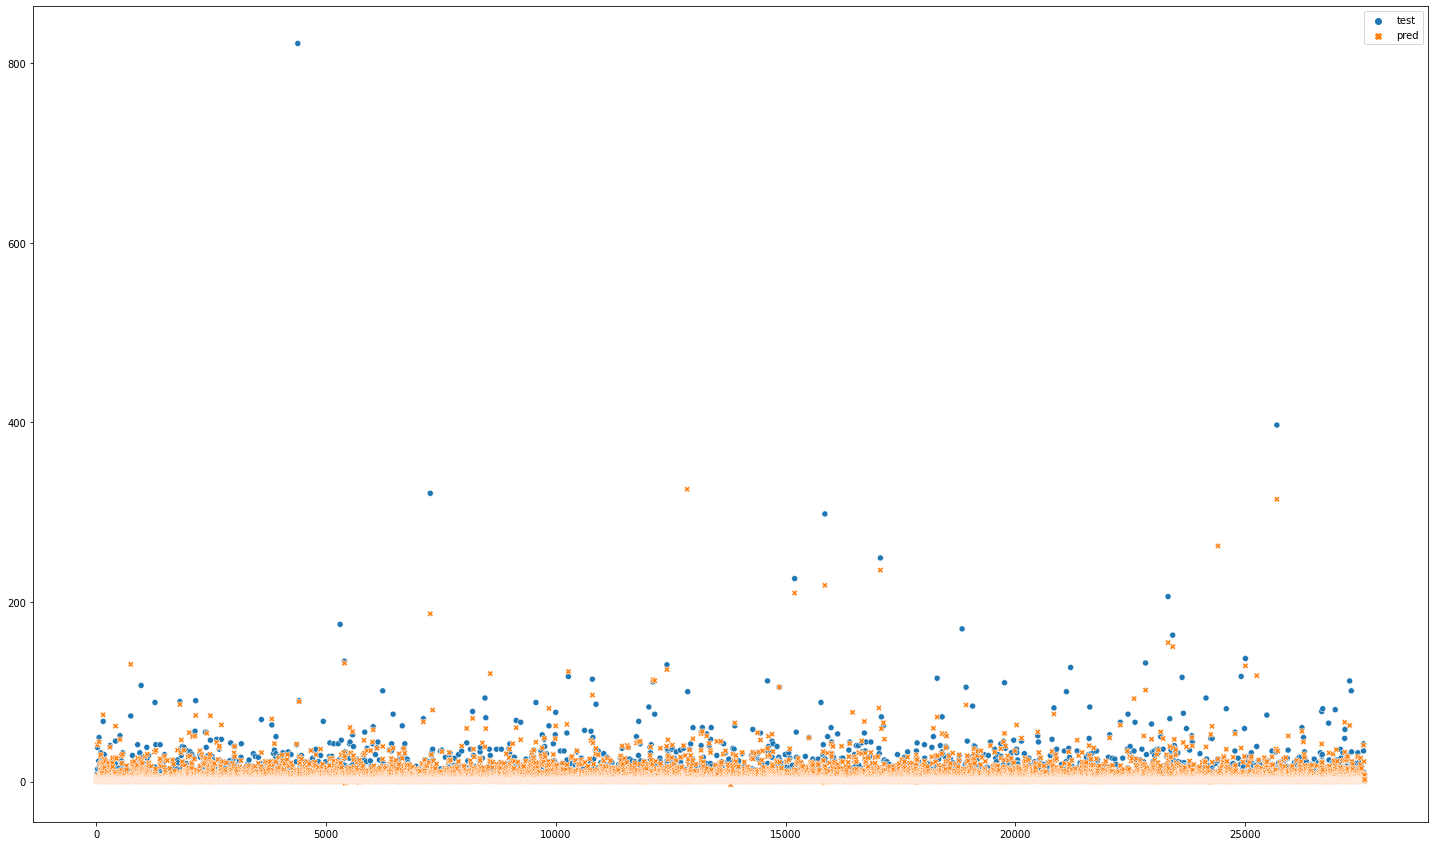

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': y_pred[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [15]:
for test, pred in zip(y_test, y_pred):
          print('test:', test)
          print('pred:', np.round(pred))

test: 1.0
pred: 1.0
test: 4.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 0.0
test: 0.0
pred: 1.0
test: 1.0
pred: 0.0
test: 3.0
pred: 3.0
test: 3.0
pred: 0.0
test: 0.0
pred: 1.0
test: 1.0
pred: 1.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 2.0
pred: 2.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 1.0
pred: 4.0
test: 2.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 0.0
test: 0.0
pred: 1.0
test: 0.0
pred: 0.0
test: 1.0
pred: 1.0
test: 0.0
pred: 1.0
test: 0.0
pred: 1.0
test: 0.0
pred: 0.0
test: 3.0
pred: 2.0
test: 5.0
pred: 3.0
test: 2.0
pred: 2.0
test: 0.0
pred: -0.0
test: 4.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 1.0
test: 0.0
pred: 0.0
test: 3.0
pred: 2.0
test: 1.0
pred: 1.0
test: 0.0
pred: 0.0
test: 1.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 1.0
test: 9.0
pred: 4.0
test: 2.0
pred: 1.0
test: 0.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 1.0
test: 1.0
pred: 1.0
test: 0.0
pred: 0.0
test: 1.0
pred: 1.0

In [16]:
temp = np.zeros(shape = X_test.shape)

temp[:, :17] = X_test[:, :17]
pred = model.predict(temp)
pred_int = np.asarray(pred, dtype = np.int32)

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (pred_int == 0)).sum()
acc/total

0.8276844840593478

In [17]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], pred_int[condition]))).sum()/y_test.shape[0]

0.8561940969538262

<AxesSubplot:>

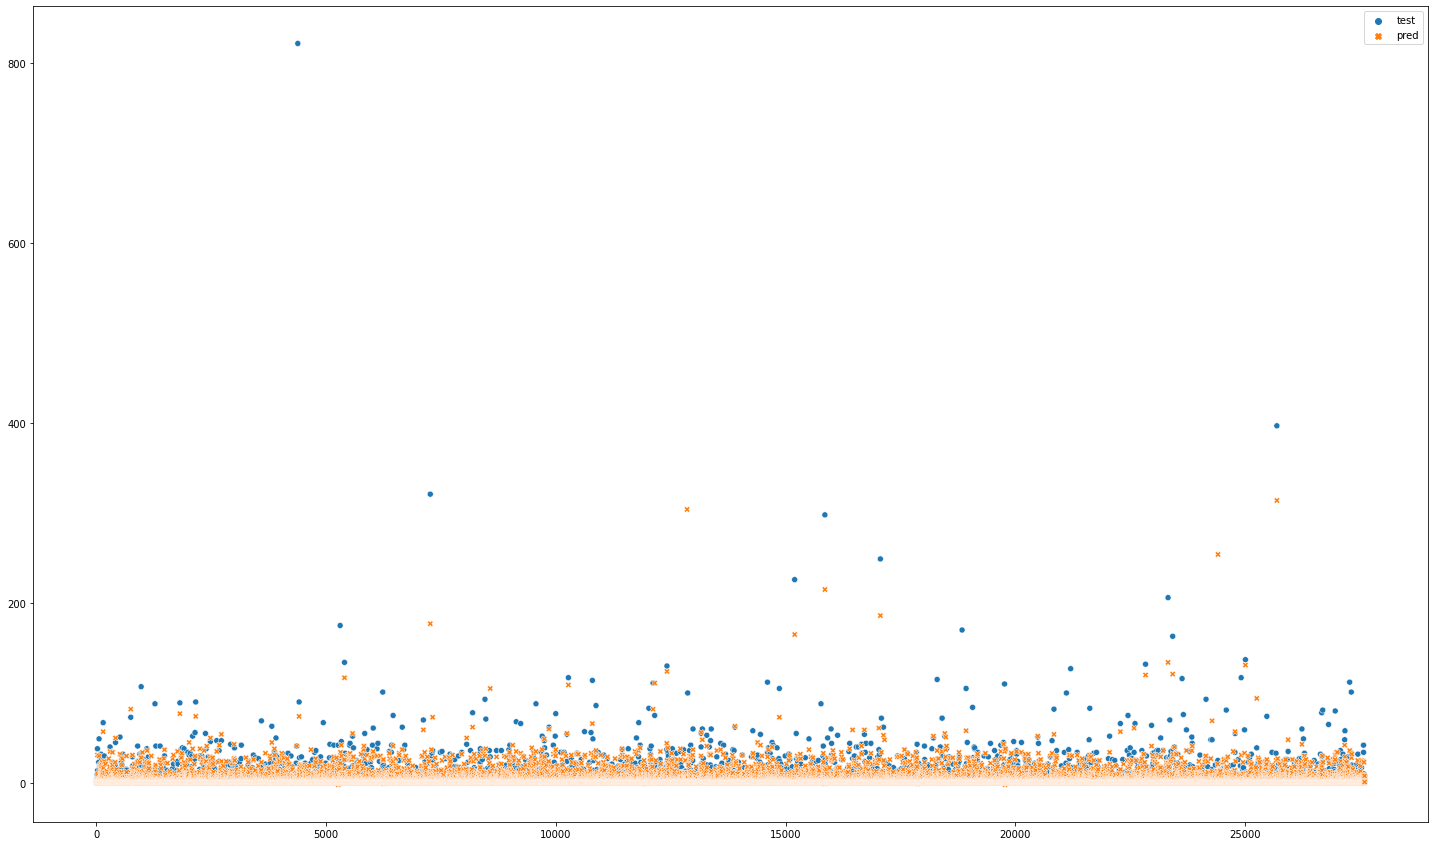

In [18]:
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': pred_int[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [19]:
temp = np.zeros(shape = X_test.shape)

temp[:, 17:] = X_test[:, 17:]
pred = model.predict(temp)
pred_int = np.asarray(pred, dtype = np.int32)

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (pred_int == 0)).sum()
acc/total

1.0

In [20]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], pred_int[condition]))).sum()/y_test.shape[0]

1.6655203420043856

<AxesSubplot:>

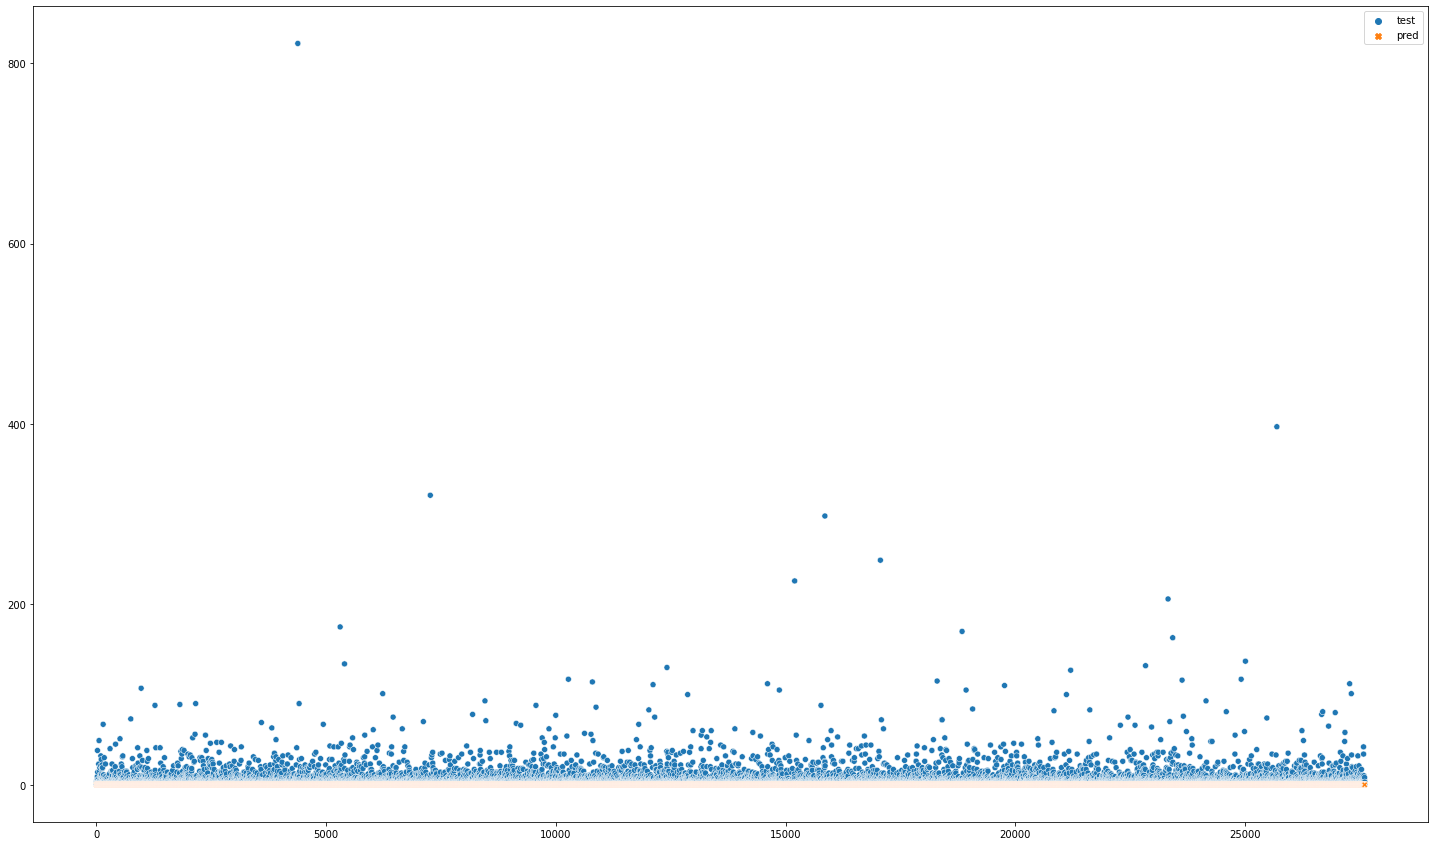

In [21]:
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': pred_int[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [22]:
print('history của 15 ngày', X_test[0, : 15])
print('Ngày', X_test[0,15 : 16])
print('Tháng', X_test[0,16 : 17])
print(y_test[0])

temp = np.zeros(shape = (1, 785))
temp[0, :17] = [0,0,0,0,1,2,0,0,4,0,0,1,0,3,1,3,12]

pred = model.predict(temp)
pred

history của 15 ngày [0. 0. 0. 0. 1. 2. 0. 0. 4. 0. 0. 1. 0. 3. 1.]
Ngày [3.]
Tháng [12.]
1.0


array([1.0308657], dtype=float32)

In [24]:
pred_int[pred_int != 0]

array([], dtype=int32)

In [23]:
for test, pred in zip(y_test, pred_int):
          print('test:', test)
          print('pred:', np.round(pred))

test: 1.0
pred: 0
test: 4.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 3.0
pred: 0
test: 3.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 3.0
pred: 0
test: 5.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 4.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 3.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 9.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 38.0
pred: 0
test: 0.0
pred: 0
test: 3.0
pred: 0
test: 3.0